In [1]:
#import library yang digunakan
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
import sklearn.metrics as metrics
from sklearn import tree
from io import StringIO
from IPython.display import Image
import pydotplus

In [3]:
#load data set dari file csv
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv('diabetes.csv', header=None, names=col_names)

In [4]:
#explore data set
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
data.drop(data.index[:1], inplace=True)

In [6]:
print(data.shape) #melihat jumlah baris dan kolom
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe() #nilai mean mediasi

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500


In [8]:
data.isnull().sum() #Check Missing Data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
7,3,78,50,32,88,31,0.248,26,1
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0,0.232,54,1


In [18]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = data[feature_cols] # Features
y = data.Outcome # Target variable

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)

In [21]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [23]:
#Cek akurasi dari model yang telah dibuat
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


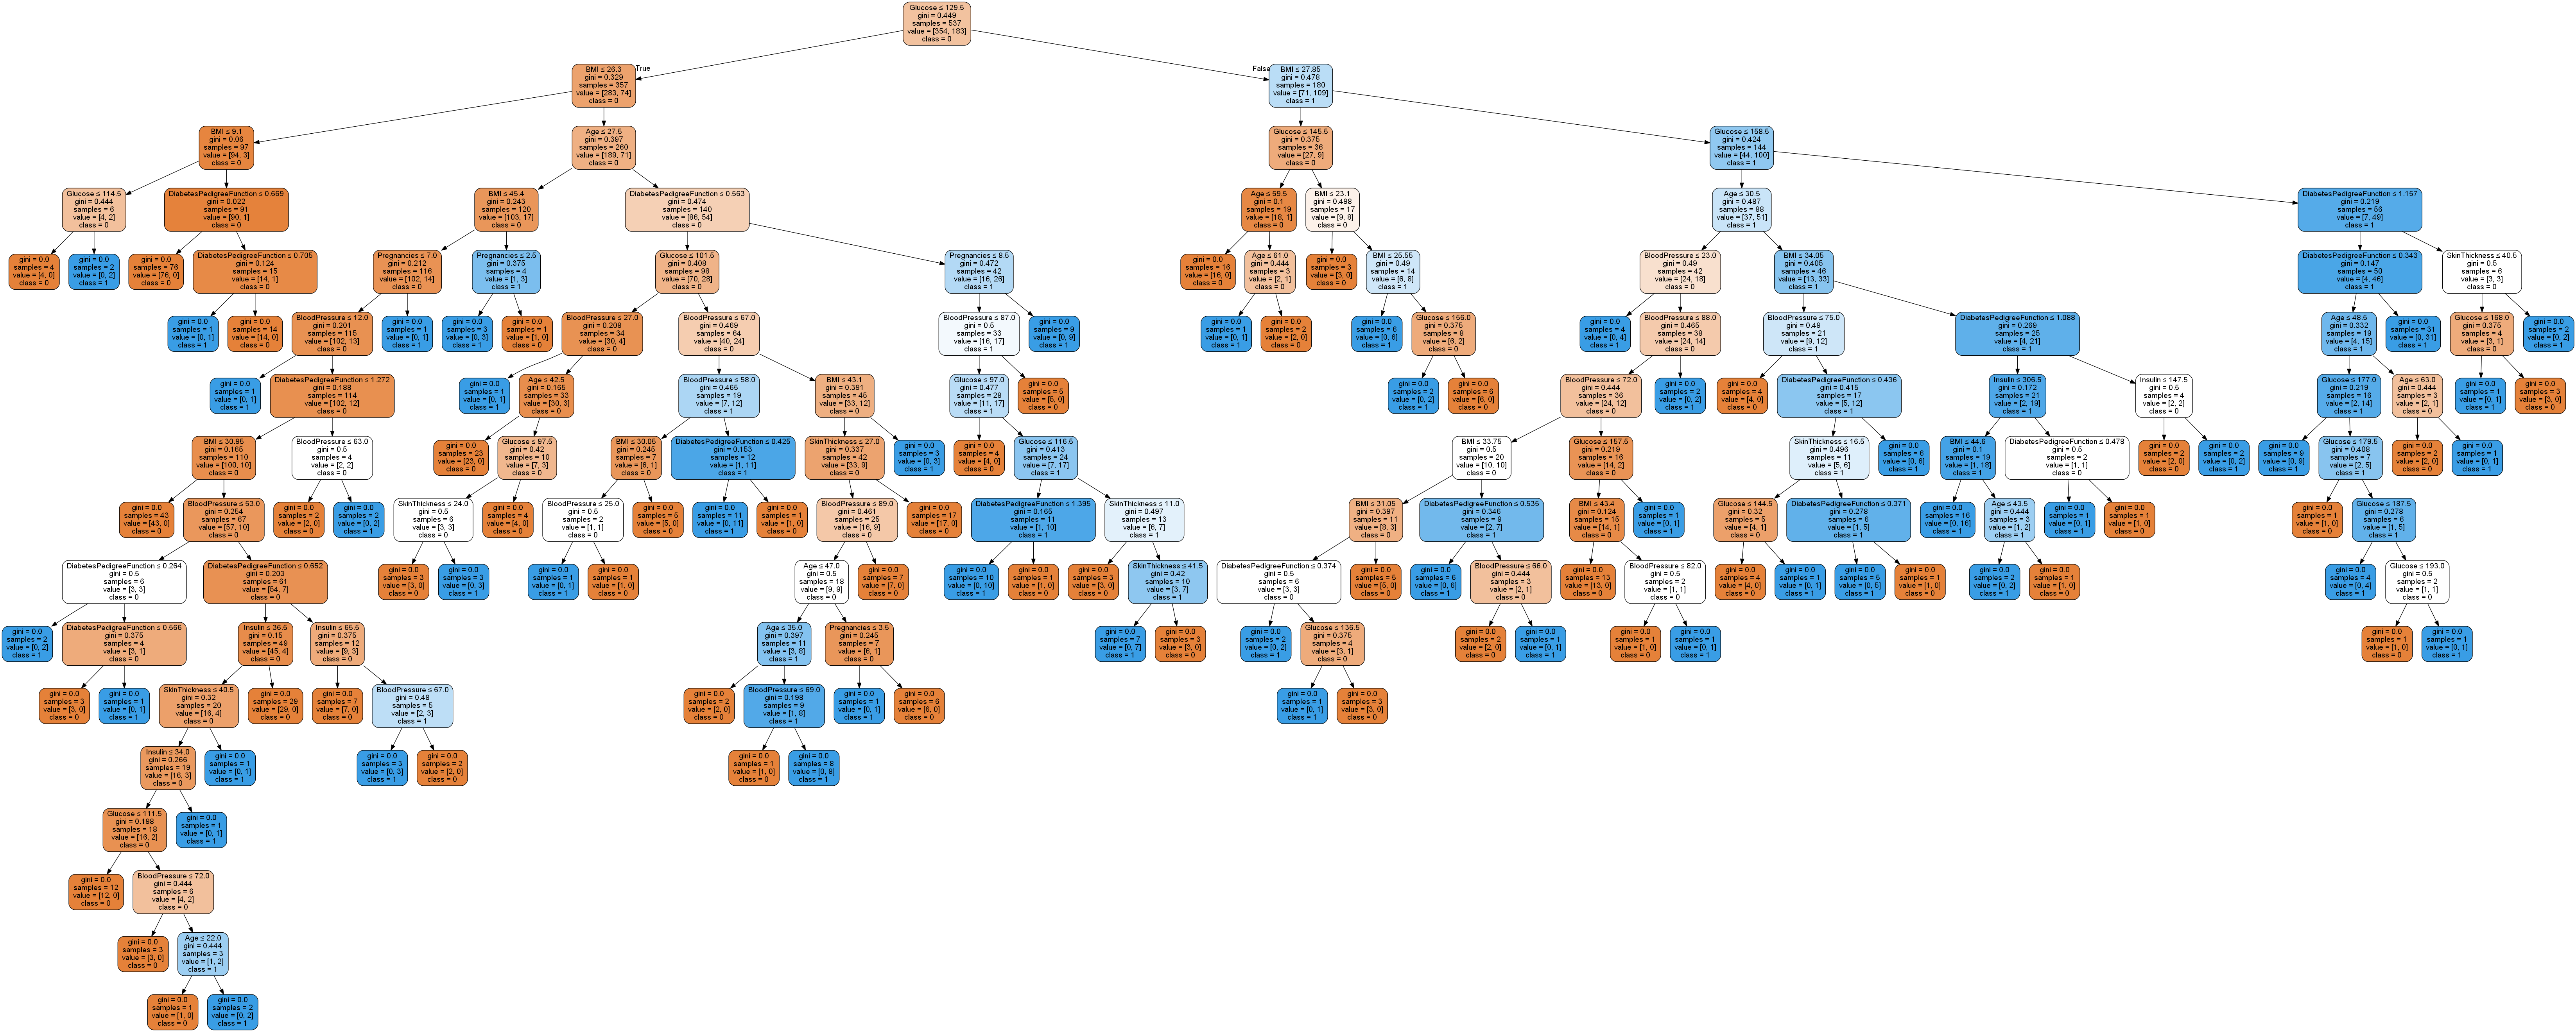

In [24]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [25]:
# Membuat clasifikasi objek Decision Tree 
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Prediksi response test dataset
y_pred = clf.predict(X_test)

#Cek akurasi dari model yang telah dibuat
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


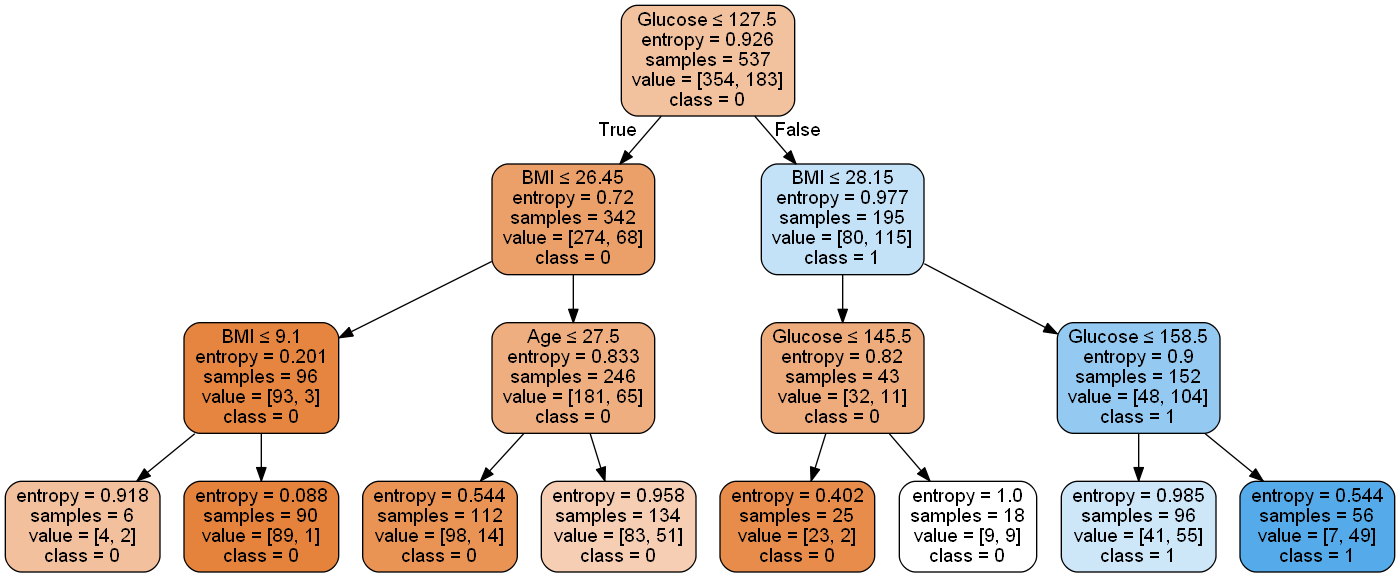

In [26]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       146
           1       0.71      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



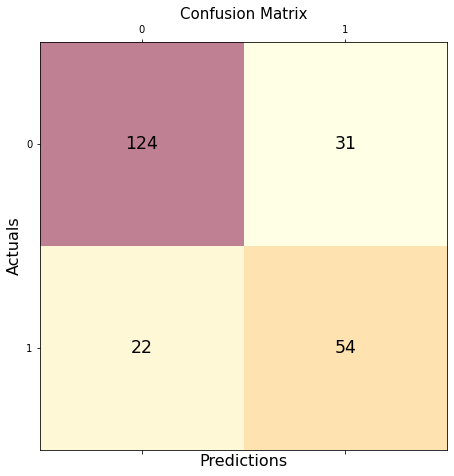

True negative =  124
False positive =  22
False negative =  31
True positive =  54


In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_pred = clf.predict(x_test)
y_true = y_test

# 0 value is negative
# 1 value is positive
mat_con = confusion_matrix(y_true, y_pred, labels=['0','1'])

fig, px = plt.subplots(figsize=(7.5, 7.5))
px.matshow(mat_con, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(mat_con.shape[0]):
    for n in range(mat_con.shape[1]):
        px.text(x=m,y=n,s=mat_con[m, n], va='center', ha='center', size='xx-large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=15)
plt.show()


# f,ax = plt.subplots(figsize=(8,4))
# sns.heatmap(cmatrix2,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
# plt.title("Model's Confusion Matrix")
# plt.xlabel("y_predict (Predicted Label)")
# plt.ylabel("y_true (Actual Label)")
# plt.show()

#1="Pozitif"
#0="Negatif"

print('True negative = ', mat_con[0][0])
print('False positive = ', mat_con[0][1])
print('False negative = ', mat_con[1][0])
print('True positive = ', mat_con[1][1])